In [1]:
suppressMessages(library(lisi))
suppressMessages(library(dplyr))
suppressMessages(library(ggplot2))
suppressMessages(library(cowplot))

In [7]:
dataset_list <- c('E12_5_rep1', 'E13_5_rep2', 'E15_5_rep1')
method_list <- c('nnSVG', 'Spanve', 'SPARK-X', 'SpatialDE', 
                 'SOMDE', 'MoranI', 'scGCO', 'SpaGCN', 'SpaGFT', 
                 'Sepal', 'SpatialDE2', 'all_peaks')

In [8]:
df_lisi <- lapply(method_list, function(method){
    df <- lapply(dataset_list, function(dataset){
        if(method == 'all_peaks'){
            input_file <- glue::glue('../../results/09_spatial_atac/02_clustering_all_peaks/{dataset}.csv')
        }else{
            input_file <- glue::glue('../../results/09_spatial_atac/03_clustering_svps/{dataset}/{method}.csv')
        }
        
        df1 <- read.csv(input_file, header = TRUE, row.names = 1)
        X <- df1[c('array_row', 'array_col')]
        meta_data <- df1[c('leiden')]
            
        res <- compute_lisi(X, meta_data, c('leiden'))
        colnames(res) <- 'LISI'
        res$method <- method
        res$dataset <- dataset

        return(res)
    
    })%>% do.call(rbind, .)
    
    return(df)
    
}) %>% do.call(rbind, .)

In [9]:
head(df_lisi)

,LISI,method,dataset
,<dbl>,<chr>,<chr>
GATGGATATGCCTATC-1,6.819078,nnSVG,E12_5_rep1
CCATAAGTCCCGTTAC-1,7.565247,nnSVG,E12_5_rep1
CTCCTTCCGAGCTGAA-1,5.222618,nnSVG,E12_5_rep1
ACCTGTTGAGCAATAC-1,6.659551,nnSVG,E12_5_rep1
GTCGTGCCGAAAGTGG-1,5.763322,nnSVG,E12_5_rep1
GAAACTCCGCAACACA-1,5.192755,nnSVG,E12_5_rep1


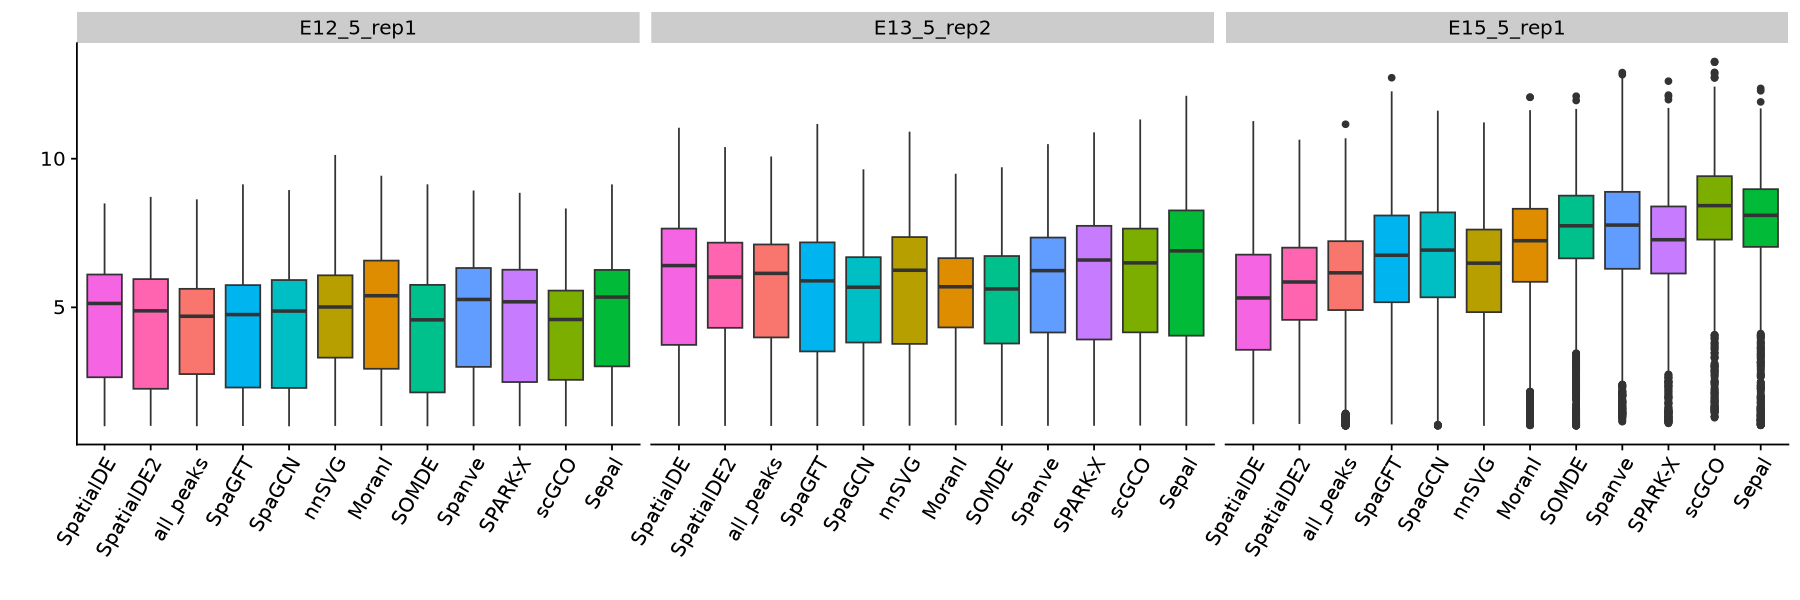

In [10]:
options(repr.plot.height = 5, repr.plot.width = 15)

p <- ggplot(data = df_lisi, aes(x = reorder(method, LISI, median), y = LISI)) +
    geom_boxplot(aes(fill = method)) +
    facet_wrap(~dataset) +
    theme_cowplot() +
    xlab("") + ylab("") +
    theme(legend.position = "none") +
    theme(axis.text.x = element_text(angle = 60, hjust = 1))

p

In [11]:
write.csv(df_lisi, "../../results/09_spatial_atac/04_LISI.csv")